# 6.2 Exploring Relationships

This script contains the following:

1. Importing Visualization Libraries and Data
2. Data Cleaning
3. Exploring Relationships

a. Correlation

b. Scatterplots

c. Pair Plots

d. Categorical Plots

1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.2'

In [3]:
path=  r'C:\Users\nehma\OneDrive\Desktop\CF Project'

In [4]:
path

'C:\\Users\\nehma\\OneDrive\\Desktop\\CF Project'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merge_all_years.csv'))

2. Data Cleaning

In [6]:
df.shape

(782, 13)

In [7]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Year', 'Happiness_rank',
       'Happiness_score', 'GDP_capita', 'Family', 'Life_expectancy', 'Freedom',
       'Gov_trust', 'Generosity', 'Dystopia_residual'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [9]:
df.dtypes

Unnamed: 0             int64
Country               object
Region                object
Year                   int64
Happiness_rank         int64
Happiness_score      float64
GDP_capita           float64
Family               float64
Life_expectancy      float64
Freedom              float64
Gov_trust            float64
Generosity           float64
Dystopia_residual    float64
dtype: object

In [10]:
# Dropping columns and creating data subset 
df1 = df.drop(['Unnamed: 0', 'Country','Region','Year'], axis=1, errors='ignore')

In [11]:
df1.head()

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [12]:
df1.isnull().sum()  # Check for missing values

Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

In [13]:
df1_dups = df[df.duplicated()]  # Find duplicates

In [14]:
df1_dups.shape #no duplicates

(0, 13)

In [15]:
for col in df1.columns.tolist():
      weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df1[weird]) > 0:
        print (col)

C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\2028106489.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\2028106489.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\2028106489.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\2028106489.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\2028106489

In [16]:
df1_columns = []

3. Exploring Relationships

In [17]:
df1.corr()  # Create a correlation matrix 

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
Happiness_rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.372781,-0.117713,-0.482706
Happiness_score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578,0.489747
GDP_capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560,0.030087
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262,-0.081537
Life_expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638,0.057674
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706,0.038422
Gov_trust,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920,0.000001
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000,-0.114468
Dystopia_residual,-0.482706,0.489747,0.030087,-0.081537,0.057674,0.038422,0.000001,-0.114468,1.000000


<Axes: >

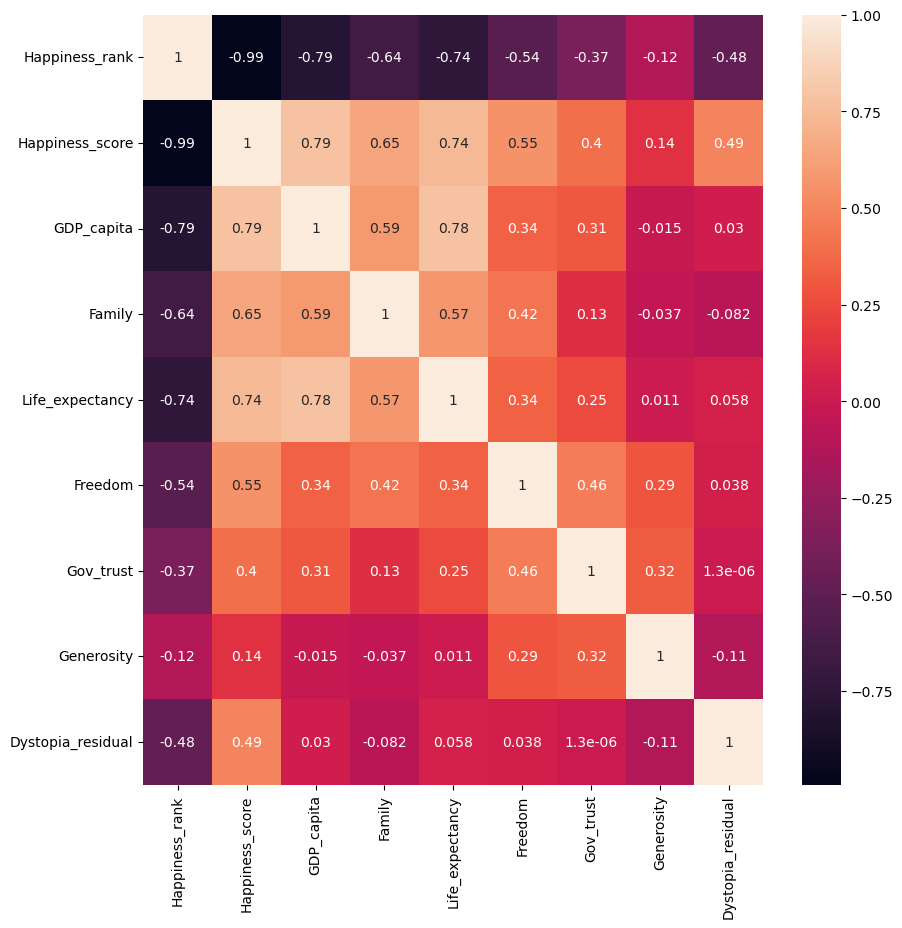

In [18]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
sns.heatmap(df1.corr(), annot = True, ax = ax)

In [19]:
plt.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'corr.png'))

<Figure size 640x480 with 0 Axes>

Happiness Rank has a strong negative correlation with Happiness Score, indicating that higher ranks (lower scores) are associated with lower happiness.
It has a negative correlation with GDP per capita, Family, Life Expectancy, Freedom, and Dystopia Residual, suggesting that as these factors improve, the Happiness Rank tends to decrease (improve).


Happiness Score has a strong positive correlation with GDP per capita, Family, and Life Expectancy, indicating that higher scores are associated with higher values of these factors.
It also has positive correlations with Freedom, Government Trust, and Generosity.


GDP per Capita has positive correlations with Happiness Score, Family, and Life Expectancy, suggesting that higher GDP per Capita is associated with higher values of these factors.


Family, Life Expectancy, Freedom, and Dystopia Residual show positive correlations with Happiness Score, indicating that higher values of these factors are associated with higher happiness scores.

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


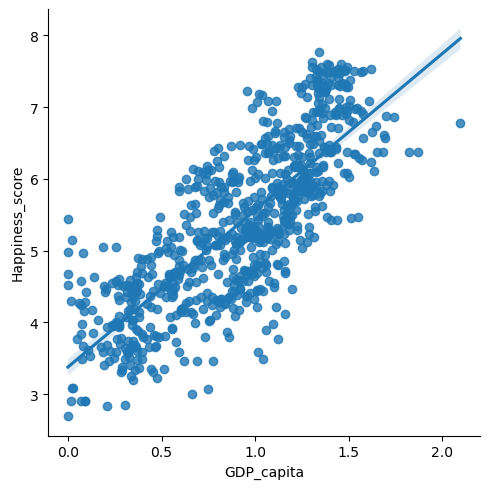

In [20]:
scat1 = sns.lmplot(x = 'GDP_capita', y = 'Happiness_score', data = df1)  # Scatterplot of most correlated variables
# GDP per capita and happiness scatterplot

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

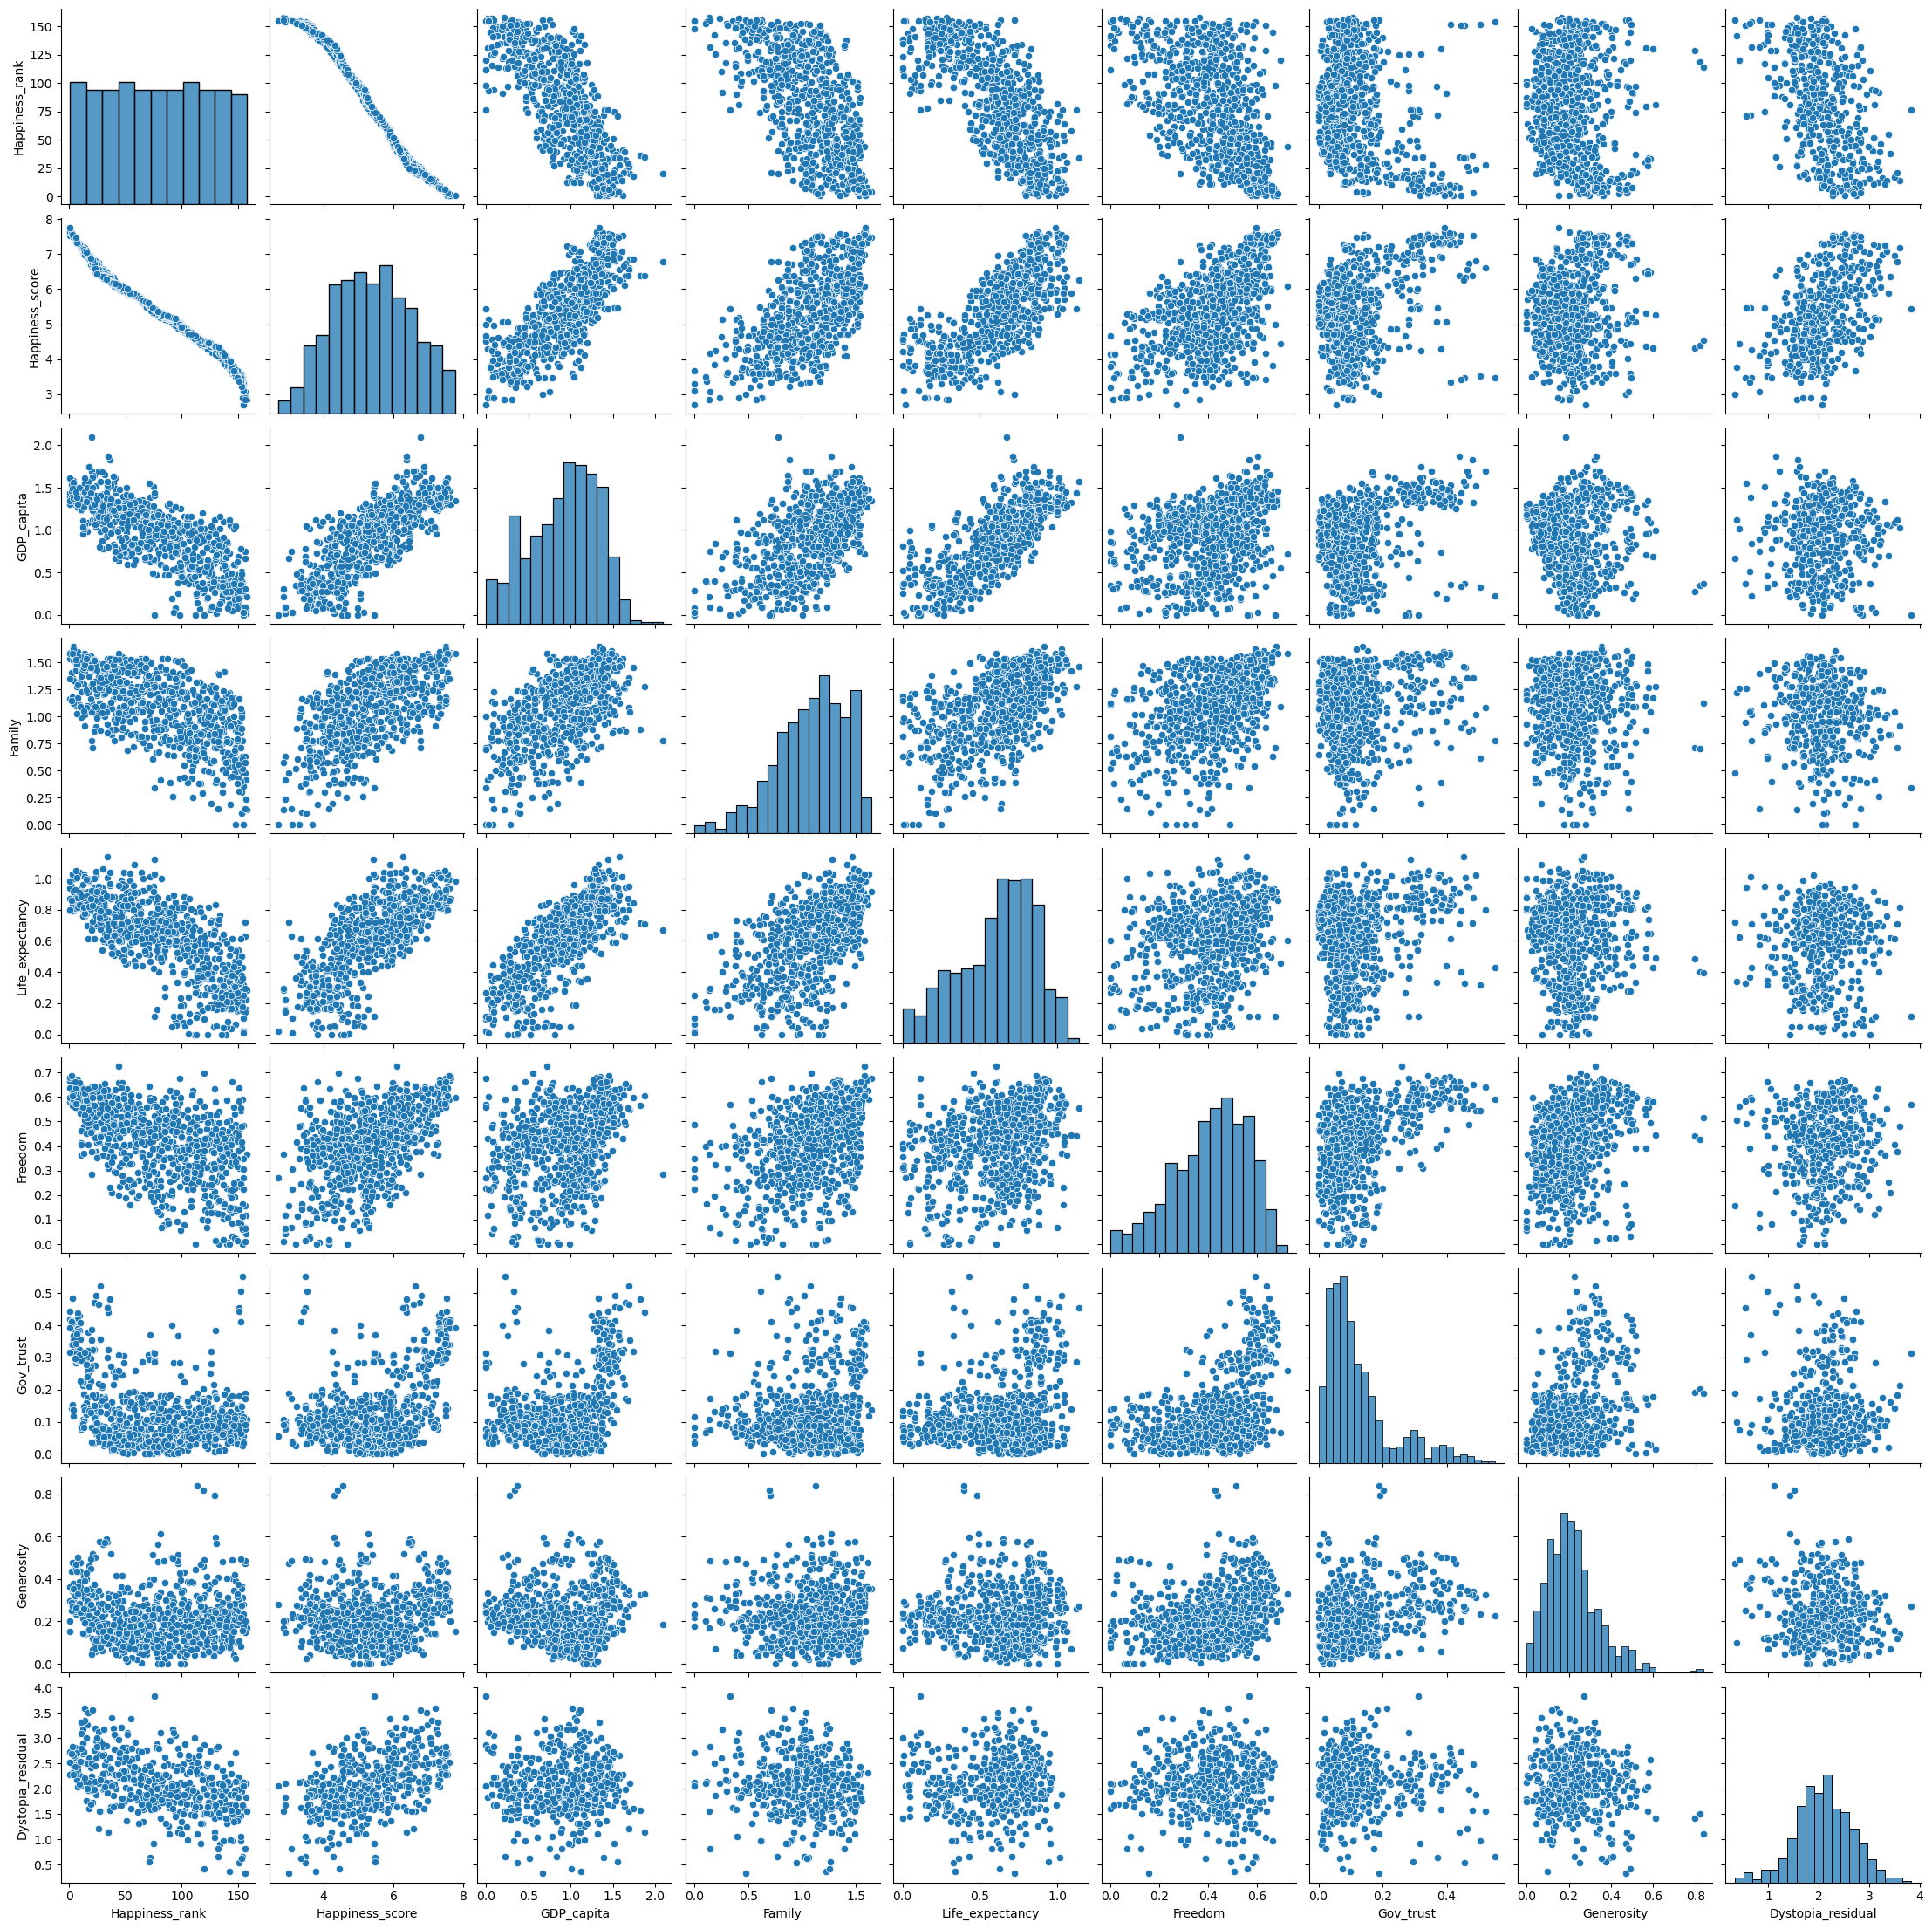

In [21]:
# Creating a pairplot
pairplot1 = pair_plot = sns.pairplot(df1)

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


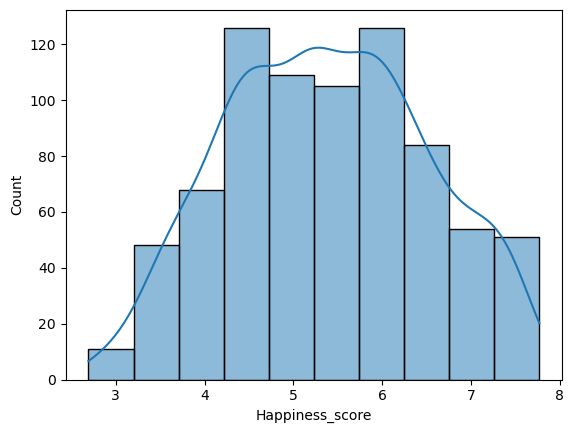

In [22]:
# Creating a histogram to see distribution
hist1 = sns.histplot(df1['Happiness_score'], bins = 10, kde = True)

In [23]:
# Creating score category for categorical plot
df1.loc[df['Happiness_score'] < 4.5 , 'Score category'] = 'Low score'
df1.loc[(df['Happiness_score'] >= 4.5) & (df1['Happiness_score'] < 6.5), 'Score category'] = 'Middle score'
df1.loc[df['Happiness_score'] >= 6.5, 'Score category'] = 'High score'
df1['Score category'].value_counts(dropna = False)

C:\Users\nehma\AppData\Local\Temp\ipykernel_43040\1678737230.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[df['Happiness_score'] < 4.5 , 'Score category'] = 'Low score'


Score category
Middle score    457
Low score       192
High score      133
Name: count, dtype: int64

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

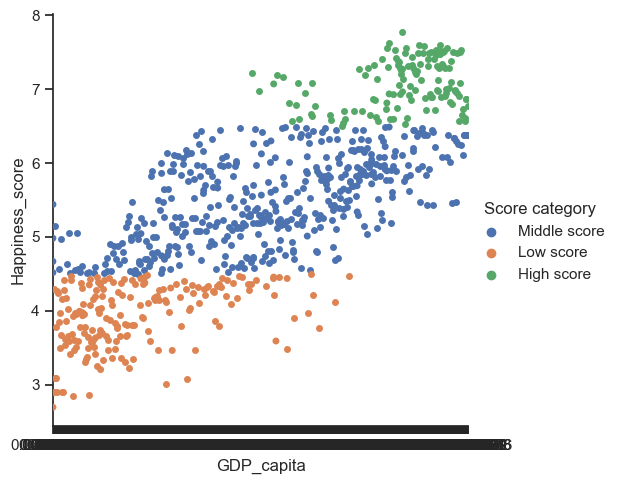

In [24]:
# Creating categorical plot with GDP per Capita
cat1 = sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='GDP_capita', y='Happiness_score', hue="Score category", data=df1)

Conclusions:
   In my analysis, I observed that GDP per capita, social support, and life expectancies emerged as the primary contributors to a country's happiness score. I also did not explore which countries experienced the most significant increases or decreases in happiness rank, nor did I identify consistently happy or unhappy countries over the years.

Hypothesis 1: A country with elevated GDP per capita, a strong family score, and high life expectancy is likely to exhibit a correspondingly high happiness score.

Null Hypothesis 1: A country with elevated GDP per capita, a strong family score, and high life expectancy is not necessarily associated with a high happiness score.

Hypothesis 2: The combination of freedom, government trust, and generosity plays a substantial role in determining a country's happiness score.

Null Hypothesis 2: The combined influence of freedom, government trust, and generosity does not significantly contribute to a country's happiness score. 

In [25]:
scat1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'correlation.png'))

hist1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'gdplifescore_hist.png'))
cat_plot_GDP.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'gdplifescore_catplot.png'))
pairplot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pairplot.png'))


In [26]:
df1.head()

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual,Score category
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,Low score
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,Middle score
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,Middle score
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,Low score
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,High score


In [27]:
df1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'mergednocountryregionyear.csv'))